<a href="https://colab.research.google.com/github/YusufGulcan/Neural_Network_Image_Classification-/blob/main/Neural_Network_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import imghdr
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import load_model

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
drive.mount('/content/drive/')    

Mounted at /content/drive/


In [ ]:
data_dir = '/content/drive/My Drive/Image Classification/Data/'      ## the directory of the files 

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']         ## create a list of extensions that we desired our images to be in.
cats = 'cats images'                            ## name of the file that includes cat images
puppies = 'Puppies image'                       ## name of the file that includes dog images

In [ ]:
os.listdir(os.path.join(data_dir,cats))        ## Try if the paths work

In [ ]:
for image_class in os.listdir(data_dir):                               ## loop through the files in the directory
  for image in os.listdir(os.path.join(data_dir, image_class)):         ## loop through the images in the files 
    image_path = os.path.join(data_dir,image_class,image)               ## the image path is the combination of the directories above
    try:
      image  =cv2.imread(image_path)                                     ## Convert the file into readable format for computer vision
      tip = imghdr.what(image_path)                                       ## Extract the extension of the image file
      plt.show(image)                                                     ## visualize the image for human eyes
      if tip not in image_exts:                                           ## if the image is not in one of the desired formats
        print('Image is not appropriate {}'.format(image_path))           ## inform the coder that an image is removed 
        os.remove(image_path)                                             ## Remove the image from the list 
    except Exception as e:
      print('Issue with image {}'.format(image_path))                     ## if there is a  problem inform the coder that the file is not found.


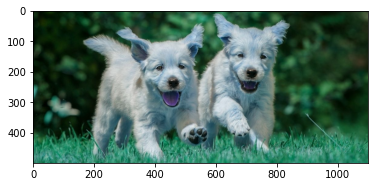

In [ ]:
img = cv2.imread(os.path.join('/content/drive/My Drive/Image Classification/Data/Puppies image/two-golden-retriever-puppies-runningjpg.jpg'))         ## convert the file into a readable format and visualize it 
plt.imshow(img)

In [ ]:
imghdr.what(os.path.join('/content/drive/My Drive/Image Classification/Data/Puppies image/two-golden-retriever-puppies-runningjpg.jpg'))          ## Show the result of imghdr.what function. It returns the extention of the file


'jpeg'

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/Image Classification/Data/')         ## Convert the data file into a format that can be read/used by keras API 
                                                                                                              ## there are 2 files which are referred as classes in the output. The directory takes 
                                                                                                              ##   2 different files and assumes that the elements in those files are the members of corresponding class.
                                                                                                              ## Which is very usefull for us to label the images.

Found 453 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()                                                  ## The keras dataset is converted into numpy binary data. 

In [ ]:
batch = data_iterator.next()                                                              ## next() function creates a batch which consists of 2 elements 
len(batch)

2

In [ ]:
print(batch[0].shape)                                                                     # the shape of the first element of the batch is (32,256,256,3)


(32, 256, 256, 3)


In [ ]:
print(len(batch[1]))                                                                      ## the other element of the batch is the labels defined by the keras API       cats and dogs we do not know which is which yet.
batch[1]

32


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

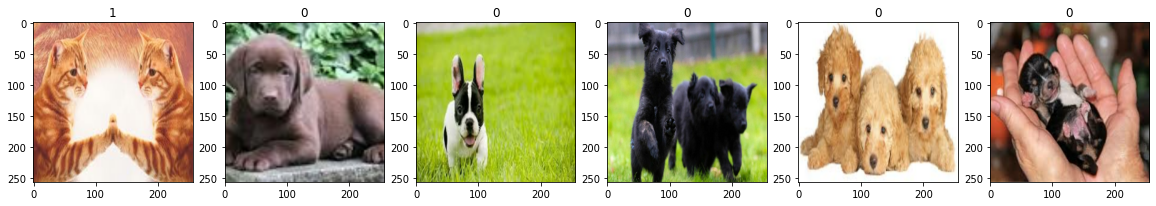

In [ ]:
fig,ax = plt.subplots(ncols=6,figsize=(20,20))                                          ## when we visualize the numpy matrices using imshow we see the images 
for idx,img in enumerate(batch[0][:6]):                                                
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])                                                 ## the code defines the label for each image. now we know which is which.  1 means cats,  0 means dog.

In [ ]:
#1 = cat ,  0 = dog
data = data.map(lambda x,y : (x / 255 , y))                                       ## Do not forget our data is in numpy matrice form. The image matrices are scaled by dividing the matrices by 255
                                                                                  ## We saw before the size for each image is 256*256. The biggest number in the matrices is 255 (it starts with 0 so the image size 256 pixels.)

In [ ]:
train_size = int(len(data)*0.7)                                                   ## We split the data into train, validation and test sets. 
val_size = int(len(data)*0.2) 
test_size = int(len(data)*0.1)+1

In [ ]:
train = data.take(train_size)                                                     ## We create data sets for each group by using take and skip functions.
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
print('The size of the train :', len(train))                                       ## batch sizes of each data sets.
print('The size of the val :', len(val))
print('The size of the test :', len(test))
print('The size of the data :', len(data))
                                                                                        ## Now the data is ready for neural network. Let's create a model 

The size of the train : 10
The size of the val : 3
The size of the test : 2
The size of the data : 15


In [ ]:
model = Sequential()                                                          ## Call an empty sequential model. This allows us to add the layers one by one.

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape =(256,256,3)))      ## Since we work with images we need a convolutional layer to start with. The input shape is defined if the layer is the first layer.
                                                                              ## The filter is defined as (3,3) which means that the images will be filtered for each 3x3 pixels. This layer filter can detect the edges in the images.
                                                                              ## the activation function is relu which converts any value below zero to zero and does not affect values above zero.

model.add(MaxPool2D())                                                        ## Another layer named 2dmaxpool is added. This layer pools the values converted convolutional layer.

model.add(Conv2D(32,(3,3),1,activation='relu'))                               ## Another pair of conv and maxpool layers is added. Basically the same step is repeated.
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))                               ## A third  pair... The reason for this iteration is the goal to convert the data into a managable size of the data.
model.add(MaxPool2D())


model.add(Flatten())                                                          ## Flatten layer converts matrices with multiple dimensions into 1-dimension arrays.

model.add(Dense(256,activation = 'relu'))                                     ## The Dense layer is deeply connected to the preceding layer which means it receives output from each node of the preceding layer. The weighted average computations are made.
model.add(Dense(1,activation = 'sigmoid'))                                    ## Another dense layer with sigmoid activation. Dense layer makes calculations and thanks to the sigmoid activation function, returns a value between 1-0. 
                                                                              ## In our case, if the output value is close to 1 (greater than 0.5), it means the image is of a cat, if it is close to 0 (smaller than 0.5) the image is of a dog.


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])          ## when the layers are defined we complie the model and it is ready to make predictions.

In [ ]:
model.summary()                                                               ## The representation of the model structure.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
logdir = '/content/drive/My Drive/Image Classification/Logs/'                                 

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir )

In [ ]:
hits = model.fit(train,epochs=20,validation_data=val, callbacks=[tensorboard_callback])               ## The model fits the data and starts training. The epoch is 20 this might cause overfitting if the model trains fast.

Epoch 1/20
10/10 [==============================] - 24s 2s/step - loss: 0.9556 - accuracy: 0.4469 - val_loss: 0.6820 - val_accuracy: 0.7188
Epoch 2/20
10/10 [==============================] - 23s 2s/step - loss: 0.6873 - accuracy: 0.5813 - val_loss: 0.6742 - val_accuracy: 0.6562
Epoch 3/20
10/10 [==============================] - 20s 2s/step - loss: 0.6658 - accuracy: 0.5938 - val_loss: 0.5975 - val_accuracy: 0.6667
Epoch 4/20
10/10 [==============================] - 25s 2s/step - loss: 0.6095 - accuracy: 0.6938 - val_loss: 0.5337 - val_accuracy: 0.7604
Epoch 5/20
10/10 [==============================] - 29s 3s/step - loss: 0.5496 - accuracy: 0.7000 - val_loss: 0.4549 - val_accuracy: 0.8333
Epoch 6/20
10/10 [==============================] - 20s 2s/step - loss: 0.4256 - accuracy: 0.8469 - val_loss: 0.4257 - val_accuracy: 0.8021
Epoch 7/20
10/10 [==============================] - 20s 2s/step - loss: 0.3968 - accuracy: 0.8219 - val_loss: 0.2927 - val_accuracy: 0.9167
Epoch 8/20
10/10 [==

In [ ]:
hits.history                                         ## The data output per each epoch is recorded 

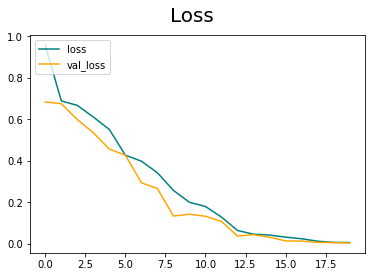

In [ ]:
fig = plt.figure()
plt.plot(hits.history['loss'],color='teal',label = 'loss')
plt.plot(hits.history['val_loss'],color='orange',label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc='upper left')
plt.show()                                                               ## the loss performance of the model is visualized. This is a usefull graph for coders to see what happens as the model trains.

In [ ]:
pre= Precision()                                                      ## different measurement metrics are called.
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():                                  ## the test data is split into features and labels. Model is makes predictions on features for each batch. 
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
  print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')    ## the measurement metric outputs are recorded.


Precision:1.0,Recall:1.0, Accuracy:1.0
Precision:1.0,Recall:1.0, Accuracy:1.0


In [ ]:
cat1 = '/content/drive/My Drive/Image Classification/Try/cat_test.jpg'                 ## I downloaded and saved brand new images from the internet. to test if the model predictions are as good as claimed to be.
cat2 = '/content/drive/My Drive/Image Classification/Try/cat_test1.jpg'
cat3 = '/content/drive/My Drive/Image Classification/Try/cat_test2.jpg'
cat4 = '/content/drive/My Drive/Image Classification/Try/cat_test3.jpg'
dog1 = '/content/drive/My Drive/Image Classification/Try/Dog_test.jpg'
dog2 = '/content/drive/My Drive/Image Classification/Try/Dog_test1.jpg'
dog3 = '/content/drive/My Drive/Image Classification/Try/Dog_test2.jpg'
dog4 = '/content/drive/My Drive/Image Classification/Try/Dog_test3.jpg'

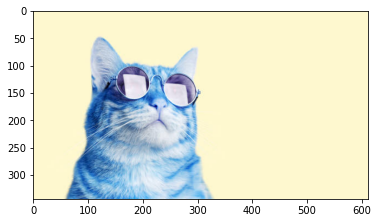

In [ ]:
img = cv2.imread(cat4)                   ## original image 
plt.imshow(img)
plt.show()

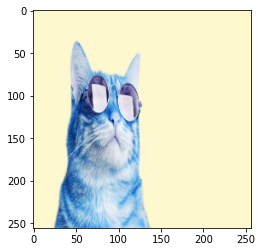

In [ ]:
resize = tf.image.resize(img,(256,256))    ## resize the image 
plt.imshow(resize.numpy().astype(int))      ## convert into numpy matrices
plt.show()                                  ## visualize scaled image.

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))     ## make the prediction for given data.

## Sigmoid activation returns a value between 0-1, 0 being DOG, and 1 being CAT. 
if yhat[0][0] > 0.5:
  print('It is a CAT')
else:
  print('It is a DOG')

It is a CAT


In [ ]:
save_path = '/content/drive/My Drive/Image Classification/Saved Models/'             ## I define a path to save the model. Saving model is a good way to avoid training the model over and over.
                                                                                     ## Especially when the data is big, the process can be overwhelming.

In [ ]:
model.save(os.path.join('/content/drive/My Drive/Image Classification/Saved Models/','cats&dogs.h5'))         ## save the model to the directory.

In [ ]:
new_model = load_model(os.path.join(save_path,'cats&dogs.h5'))                       ## load the saved model.

In [ ]:
y_pred=new_model.predict(np.expand_dims(resize/255,0))                                  ## make prediction with loaded model to check if it works.

In [ ]:
## Sigmoid activation returns a value between 0-1, 0 being DOG, and 1 being CAT. 
if y_pred[0][0]>0.5:
    print('It is a CAT')
else:
  print('It is a DOG')                                ## the model works as intended. 

It is a CAT
